The Goal is to make an Image Classifier that works on any DataSet (Virtually)

# Starting with the Project
____

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import imghdr

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.models import load_model

import os

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### *Setting up and Checking some Dependencies*

In [2]:
cpus = tf.config.experimental.list_physical_devices('CPU')
print("No. of CPU available = ", len(cpus))
print(cpus)

gpus = tf.config.experimental.list_physical_devices('GPU')
print("\nNo. of GPU available = ", len(gpus))
print(gpus)

No. of CPU available =  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

No. of GPU available =  0
[]


Out of memory (OOM) is an often undesired state of computer operation where no additional memory can be allocated for use by programs or the operating system.

# Loading the Data and Preprocessing

### *Removing dodgy images* 
Images that are or might be corrupted or with errors (like wrong extension etc)

In [3]:
# loading the Data Directory
data_dir = 'Data_Code2'

In [4]:
# Checking the Contents of Data Directory
os.listdir(data_dir)

['Box_imgs', 'No_Box_imgs']

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
# Removing unwanted (dodgy) Image Types

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Data_Code2\No_Box_imgs\vector.svg
Image not in ext list Data_Code2\No_Box_imgs\vector10.svg
Image not in ext list Data_Code2\No_Box_imgs\vector11.svg
Image not in ext list Data_Code2\No_Box_imgs\vector12.svg
Image not in ext list Data_Code2\No_Box_imgs\vector13.svg
Image not in ext list Data_Code2\No_Box_imgs\vector14.svg
Image not in ext list Data_Code2\No_Box_imgs\vector15.svg
Image not in ext list Data_Code2\No_Box_imgs\vector16.svg
Image not in ext list Data_Code2\No_Box_imgs\vector2.svg
Image not in ext list Data_Code2\No_Box_imgs\vector3.svg
Image not in ext list Data_Code2\No_Box_imgs\vector4.svg
Image not in ext list Data_Code2\No_Box_imgs\vector5.svg
Image not in ext list Data_Code2\No_Box_imgs\vector6.svg
Image not in ext list Data_Code2\No_Box_imgs\vector7.svg
Image not in ext list Data_Code2\No_Box_imgs\vector8.svg
Image not in ext list Data_Code2\No_Box_imgs\vector9.svg


### *Loading the Dataset*

In [7]:
# Loading the Data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 561 files belonging to 2 classes.


In [8]:
# as_numpy_iterator() will preserve the nested structure of dataset elements.
data_iterator = data.as_numpy_iterator()

In [9]:
# if we run it again it will give another batch of data
batch = data_iterator.next()

In [10]:
print(data_iterator)
print(len(batch))
print(batch[0])

2
[[[[2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   ...
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]]

  [[2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   ...
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]]

  [[2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   ...
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]]

  ...

  [[2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500000e+02 2.5500000e+02]
   [2.5500000e+02 2.5500

In [11]:
# Image Represented as Numpy array
batch[0].shape

(32, 256, 256, 3)

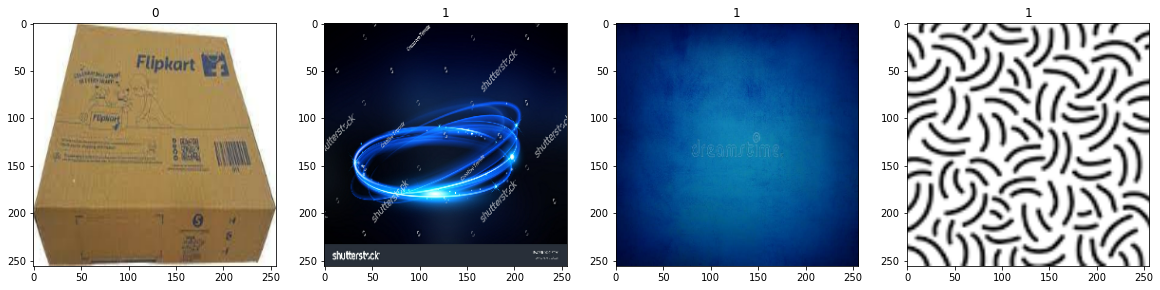

In [12]:
# plotting 4 images at a Time (ncols=4)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### *Scaling the Data*

In [13]:
print("Min value in batch[0] = ",batch[0].min())
print("Max value in batch[0] = ",batch[0].max())

Min value in batch[0] =  0.0
Max value in batch[0] =  255.0


 Map in Python is a function that works as an iterator to return a result 
 after applying a function to every item of an iterable (tuple, lists, etc.). 
 It is used when you want to apply a single transformation function to all the iterable elements. 
 The iterable and function are passed as arguments to the map in Python.
 
 A lambda expression is a way of creating a little function inline, without all the syntax of a def. 
 Here is a lambda with a single n parameter, returning the parameter value doubled.

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
# Scaled data (batch)
data.as_numpy_iterator().next()[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

### *Splitting the DataSet*

In [16]:
# length of data (ie, no. of batches)
len(data)

18

In [17]:
# splitting into 70%train, 20%validation, 10%test

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1 +1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Creating the Deep Learning (CNN) Model

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### *Training the Model*

In [25]:
# having a log directory for checkpoints and recovery
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 0.7533 - accuracy: 0.6250 - val_loss: 0.5711 - val_accuracy: 0.7500
Epoch 2/20
12/12 [==============================] - 22s 2s/step - loss: 0.6199 - accuracy: 0.7214 - val_loss: 0.5966 - val_accuracy: 0.7083
Epoch 3/20
12/12 [==============================] - 22s 2s/step - loss: 0.6026 - accuracy: 0.6380 - val_loss: 0.5832 - val_accuracy: 0.7083
Epoch 4/20
12/12 [==============================] - 22s 2s/step - loss: 0.5611 - accuracy: 0.7135 - val_loss: 0.5299 - val_accuracy: 0.7188
Epoch 5/20
12/12 [==============================] - 22s 2s/step - loss: 0.4449 - accuracy: 0.8359 - val_loss: 0.4161 - val_accuracy: 0.8229
Epoch 6/20
12/12 [==============================] - 22s 2s/step - loss: 0.3709 - accuracy: 0.8229 - val_loss: 0.2651 - val_accuracy: 0.9271
Epoch 7/20
12/12 [==============================] - 22s 2s/step - loss: 0.2693 - accuracy: 0.8984 - val_loss: 0.2054 - val_accuracy: 0.9271
Epoch 8/20
12/12 [==

# Model Evaluation

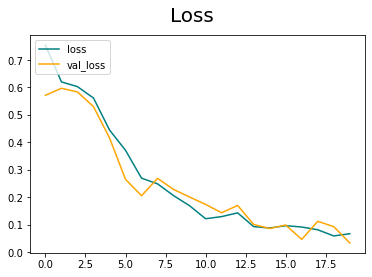

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

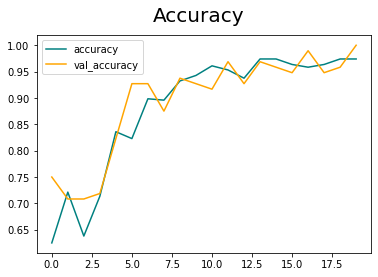

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 307ms/step


In [31]:
print(pre.result())
print(re.result())
print(acc.result())

tf.Tensor(0.962963, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.984375, shape=(), dtype=float32)


### *Testing the Model by Making Predictions*

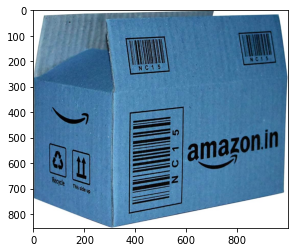

In [32]:
# Test Image
img = cv2.imread('C:/Users/KIIT/AK - MY FILES (ML)/4) Neural Networks Projects/Any Image Classifier (CNN)/Data_Code2/Box_imgs/71IuDXXivlL._AC_UF10001000_QL80_.jpg')
plt.imshow(img)
plt.show()

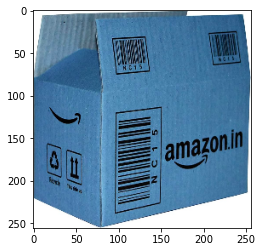

In [33]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 216ms/step


In [35]:
yhat

array([[0.9999596]], dtype=float32)

In [36]:
if yhat > 0.5: 
    print(f'Predicted class is No_Box')
else:
    print(f'Predicted class is Box')

Predicted class is No_Box


# Saving the Model

In [37]:
model.save(os.path.join('models','BOXclassifier_1.h5'))

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
new_model = load_model('models/Boxclassifier_1.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 213ms/step


array([[0.9999596]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is No_Box')
else:
    print(f'Predicted class is Box')

Predicted class is No_Box
